In [83]:
import json
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    data = pd.DataFrame(json.load(data_file))
    
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [85]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [86]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [87]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [88]:
logins.isnull().sum()

login_time    0
dtype: int64

In [89]:
len(data)

50000

In [90]:
avg_by_driver = np.mean(data['avg_rating_by_driver'])
avg_by_driver

4.778158195947439

In [91]:
data['avg_rating_by_driver']= data['avg_rating_by_driver'].fillna(int(avg_by_driver))
print(data.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver         0
dtype: int64


In [92]:
avg_of_driver = np.mean(data['avg_rating_by_driver'])
avg_of_driver

4.77502999999973

In [93]:
data['avg_rating_of_driver']= data['avg_rating_of_driver'].fillna(int(avg_of_driver))
print(data.isnull().sum())

city                        0
trips_in_first_30_days      0
signup_date                 0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
surge_pct                   0
ultimate_black_user         0
weekday_pct                 0
avg_dist                    0
avg_rating_by_driver        0
dtype: int64


In [94]:
data['phone'] = data['phone'].fillna('Other')
print(data.isnull().sum())

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


In [95]:
sorted_cities = data['city'].sort_values()
sorted_cities.head()

49999    Astapor
13706    Astapor
13705    Astapor
33004    Astapor
33009    Astapor
Name: city, dtype: object

In [96]:
cities_counted = sorted_cities.value_counts()
cities_counted = cities_counted.rename_axis("city").reset_index(name = "count")

<BarContainer object of 3 artists>

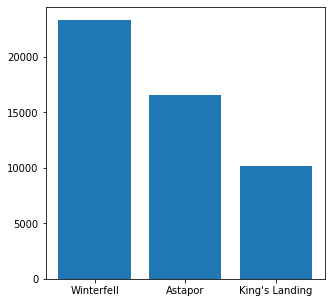

In [97]:
x = list(cities_counted['city'])
y = list(cities_counted['count'])

plt.figure(figsize = (5,5))
plt.bar(x,y)

In [98]:
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [99]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.index = logins['login_time']
logins['count'] = 1

In [100]:
logins_15 = pd.DataFrame(logins['count'].resample('15Min').sum())

In [101]:
logins_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


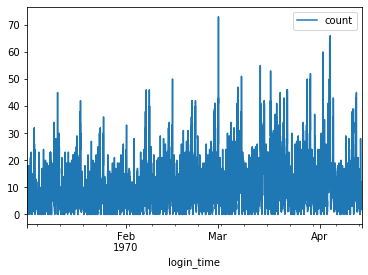

In [102]:
logins_15.plot(kind = "line")

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
        A key measure of success of this experienment is the increase of numbers used during the day or night. If both cities get more traffic during the day and the night, then you'd be able to tell if the vheicles have started using the toll bridge.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
        The experiment I'd probably look into is through some statistical methods such frequentist inference which would allow me to find the frequency in which cars are used in both cities during the day and the night.
    b. what statistical test(s) you will conduct to verify the significance of the observation
        I'd use A/B testing to verify the singificance. This is so I can compare before and affer to see if there was any significant change in how much each city is being used before and after they implement the toll compensation.
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        If there is a difference, then I think it would also be fair to see if the total amount of use increases as well. If it doesn't, then toll price isn't a factor in how much people use the service. But if there is some siginificant difference then it would be wise to keep the toll compensation in place. One thing though is I think that the amount people travel from one city to another will be better tellers of whether or not it was significant. That way before and after you can see if people were more willing to travel between cities and see that people are partnerned between.

Question 3

Question 1: perform exploratory analysis on the retained users.

In [103]:
month_trips = data['trips_in_first_30_days'].sort_values()
month_trips.head()

24999    0
24518    0
24515    0
24505    0
24503    0
Name: trips_in_first_30_days, dtype: int64

In [104]:
number_of_days = month_trips.value_counts()
number_of_days = number_of_days.rename_axis("trips_in_first_30_days").reset_index(name = "count_month")

<BarContainer object of 59 artists>

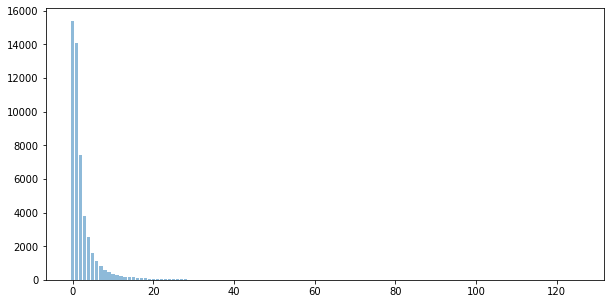

In [105]:
xm = list(number_of_days['trips_in_first_30_days'])
ym = list(number_of_days['count_month'])

plt.figure(figsize = (10,5))
plt.bar(xm, ym, alpha=0.5)

In [106]:
#if the date sign up + 30 is earlier than the last date they used it, then they weren't retained after 30 days

In [107]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [108]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [109]:
from datetime import date, timedelta


In [110]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [111]:
#data.retained.plot()

In [112]:
data_no_return = data.copy()
data_return = data.copy()

In [113]:
# Get names of indexes for which column Age has value 30
indexNames = data_no_return[ data_no_return['trips_in_first_30_days'] != 0 ].index
 
# Delete these row indexes from dataFrame
data_no_return.drop(indexNames , inplace=True)

In [114]:
len(data_no_return)

15390

In [115]:
# Get names of indexes for which column Age has value 30
indexNames = data_return[data_return['trips_in_first_30_days'] == 0 ].index
 
# Delete these row indexes from dataFrame
data_return.drop(indexNames , inplace=True)

len(data_return)

34610

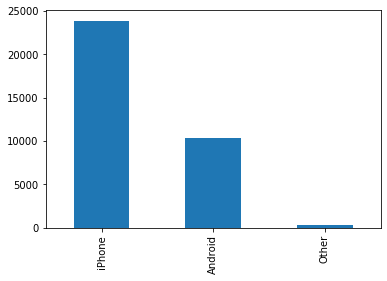

In [116]:
data_return.phone.value_counts().plot(kind = "bar")

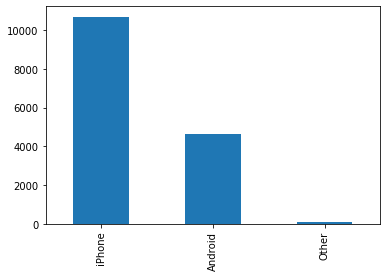

In [117]:
data_no_return.phone.value_counts().plot(kind = "bar")

In [118]:
print("Average distance of people who have used it within 30 days: ", data_return['avg_dist'].mean())
print("Average distance of people who have NOT used it within 30 days: ", data_no_return['avg_dist'].mean())

Average distance of people who have used it within 30 days:  5.529568043917937
Average distance of people who have NOT used it within 30 days:  6.397854450942169


In [119]:
print("Avg rating of driver 30days: ", data_return['avg_rating_of_driver'].mean())
print("Avg rating of driver NO 30days: ", data_no_return['avg_rating_of_driver'].mean())

Avg rating of driver 30days:  4.5150707887892745
Avg rating of driver NO 30days:  4.478589993502302


In [120]:
print("Avg rating of customer 30days: ", data_return['avg_rating_by_driver'].mean())
print("Avg rating of customer NO 30days: ", data_no_return['avg_rating_by_driver'].mean())

Avg rating of customer 30days:  4.769988442646459
Avg rating of customer NO 30days:  4.786367771280087


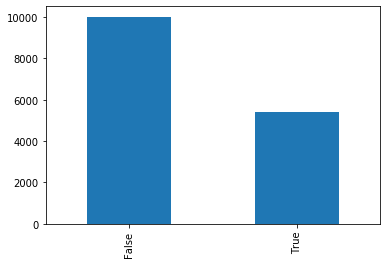

In [121]:
data_no_return.ultimate_black_user.value_counts().plot(kind = "bar")

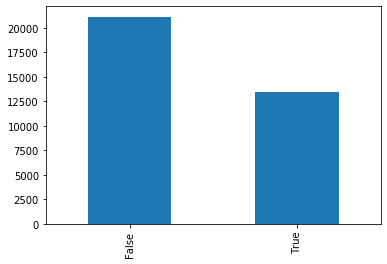

In [122]:
data_return.ultimate_black_user.value_counts().plot(kind = "bar")

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
#if they do have a trip within first 30 days then 1, otherwise 0
#delete the true/false ones

In [125]:
data['data_retained'] = np.where(data['trips_in_first_30_days'] >0, 1, 0)

In [126]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,data_retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,1


In [139]:
feature_col = ["weekday_pct", "avg_rating_of_driver", "avg_surge", "surge_pct", "avg_dist", "avg_rating_by_driver"]
#feature columns

X = data[feature_col]
y = data.data_retained

In [140]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[   21  4641]
 [   28 10310]]


There's definitely some imbalance and misclassification within the logistic regression model seeing that some of whether or not it was retained didn't fully predict it correctly. So this model wasn't the best option for predicting if people would stay long term.

In [143]:
#predictions
predictions = lr.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.43      0.00      0.01      4662
           1       0.69      1.00      0.82     10338

    accuracy                           0.69     15000
   macro avg       0.56      0.50      0.41     15000
weighted avg       0.61      0.69      0.56     15000



In [146]:
from scipy.stats import ttest_ind

ttest_ind(X, y, equal_var=False)

Ttest_indResult(statistic=array([ 363.19084469, 1117.69512279,  166.96557309,   91.36557207,
        199.34174116, 1418.56674713]), pvalue=array([0., 0., 0., 0., 0., 0.]))

In [147]:
return_corr_pear = data_return.corr(method = 'pearson')
return_corr_pear

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,1.000000,0.067006,-0.008119,0.001677,0.126496,0.073690,-0.153418,-0.040309
avg_rating_of_driver,0.067006,1.000000,-0.021905,-0.001314,0.009933,0.022213,-0.013471,0.093614
avg_surge,-0.008119,-0.021905,1.000000,0.792811,-0.076317,-0.109399,-0.077098,0.012954
surge_pct,0.001677,-0.001314,0.792811,1.000000,-0.102020,-0.147898,-0.099673,0.022766
ultimate_black_user,0.126496,0.009933,-0.076317,-0.102020,1.000000,0.022996,0.018227,0.020882
weekday_pct,0.073690,0.022213,-0.109399,-0.147898,0.022996,1.000000,0.095186,0.019245
avg_dist,-0.153418,-0.013471,-0.077098,-0.099673,0.018227,0.095186,1.000000,0.088906
avg_rating_by_driver,-0.040309,0.093614,0.012954,0.022766,0.020882,0.019245,0.088906,1.000000


In [148]:
no_return_corr_pear = data_no_return.corr(method = 'pearson')
no_return_corr_pear

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,1.000000,-0.024949,-0.000267,0.011993,0.016235,-0.030788,0.093810
avg_surge,NaN,-0.024949,1.000000,0.795327,-0.085738,-0.111183,-0.087601,-0.001089
surge_pct,NaN,-0.000267,0.795327,1.000000,-0.119022,-0.139863,-0.110632,0.009238
ultimate_black_user,NaN,0.011993,-0.085738,-0.119022,1.000000,0.062607,0.067075,-0.002326
weekday_pct,NaN,0.016235,-0.111183,-0.139863,0.062607,1.000000,0.111141,0.025326
avg_dist,NaN,-0.030788,-0.087601,-0.110632,0.067075,0.111141,1.000000,0.061044
avg_rating_by_driver,NaN,0.093810,-0.001089,0.009238,-0.002326,0.025326,0.061044,1.000000


The model wasn't very accurate and was most likely just random chance that it happened to guess thing right based on the accuracy score. One factor that was different from whether or not the customers came back or not was based on the average distance they travelled in order to get there. Another factor that differed between the two groups was also whether or not they used ultimate black. The better experience could have led them to come back.

Something I would do moving forward is to try some more models for classification such as trees or SVM to see which models could be more accurate in their predictions on whether or not people will be retained after using the ultimate services.